In [1]:
!pip install ultralytics roboflow supervision --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 67.6 MB/s eta 0:00:00


In [4]:
import cv2
import yaml
import glob
import ultralytics
import numpy as np
import supervision as sv
from IPython import display
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import display, Image

ultralytics.checks()

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [7]:
rf            = Roboflow(api_key="OZUB176TF7aGA5owdvb3")
project  = rf.workspace("jong-k0uwa").project("isw_light_bee")
dataset = project.version(1).download(
    "yolov8",
    location = 'datasets/ISW_LIGHT_BEE-1'
)
yaml_dict = {
    'nc':1,
    'path': 'ISW_LIGHT_BEE-1',
    'train': 'train/images',
    'val': 'valid/images',
    'names': {0: 'Bee'}

}

with open('data_config.yaml', 'w+') as yml_file:
    yaml.dump(yaml_dict, yml_file)

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.48, to fix: `pip install ultralytics==8.0.196`


In [8]:
model = YOLO('yolov9s.pt ')
batch = 32
patience = 15
epochs = 300
optimizer = 'auto'
data_config = '/content/data_config.yaml'
project = 'bee-training'
name = 'exp_v1'
results = model.train(
    data=data_config,
    epochs=epochs,
    imgsz=640,
    project=project,
    patience=patience,
    name=name,
    batch=batch,
    optimizer=optimizer,
    plots = True
)

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/content/data_config.yaml, epochs=300, time=None, patience=15, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=bee-training, name=exp_v12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 94.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     31104  ultralytics.nn.modules.block.ELAN1           [64, 64, 64, 32]              
  3                  -1  1     73984  ultralytics.nn.modules.block.AConv           [64, 128]                     
  4                  -1  1    258432  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 128, 128, 64, 3]        
  5                  -1  1    221568  ultralytics.nn.modules.block.AConv           [128, 192]                    
  6                  -1  1    579648  ultralytics.nn.modules.block.RepNCSPELAN4    [192, 192, 192, 96, 3]        
  7                  -1  1    442880  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 312MB/s]
Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/datasets/ISW_LIGHT_BEE-1/train/labels... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<00:00, 1287.99it/s]

train: New cache created: /content/datasets/ISW_LIGHT_BEE-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/ISW_LIGHT_BEE-1/valid/labels... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<00:00, 1976.25it/s]

val: New cache created: /content/datasets/ISW_LIGHT_BEE-1/valid/labels.cache


Plotting labels to bee-training/exp_v12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to bee-training/exp_v12
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      10.6G      2.842      3.767      1.806        316        640: 100%|██████████| 3/3 [00:11<00:00,  3.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.15s/it]

                   all         14        332    0.00214     0.0271    0.00111   0.000431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      10.4G      2.842      3.849      1.852        206        640: 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         14        332     0.0226     0.0663     0.0177    0.00625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      10.5G      2.716      2.405       1.69        403        640: 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         14        332       0.39      0.455      0.335      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      10.4G      2.461      2.561      1.627        259        640: 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         14        332      0.314      0.442      0.257     0.0797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      10.6G      2.397      1.768      1.518        224        640: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         14        332      0.457      0.578      0.403      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      10.4G      2.242      1.335      1.462        322        640: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         14        332      0.375      0.671      0.343      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      10.5G       2.21      1.272      1.428        258        640: 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all         14        332      0.767      0.768      0.838      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      10.5G      2.073      1.092      1.382        365        640: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         14        332      0.452      0.792      0.449      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      10.5G      2.132      1.021      1.329        354        640: 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         14        332      0.112      0.364     0.0874     0.0218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      10.4G      2.065     0.9934       1.31        293        640: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         14        332       0.48       0.75      0.471      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      10.5G      2.083     0.9799      1.384        360        640: 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         14        332      0.333       0.75      0.408      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      10.5G      2.102      1.028      1.364        245        640: 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         14        332      0.556      0.735      0.646      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      10.6G      2.052      1.019      1.397        179        640: 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         14        332      0.676      0.717      0.736       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      10.3G      2.001     0.9564      1.397        207        640: 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         14        332      0.823      0.816      0.859      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      10.6G      1.977     0.9088      1.322        304        640: 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         14        332      0.563      0.668      0.575      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      10.5G      1.939     0.8944      1.313        262        640: 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         14        332       0.61      0.497      0.541      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      10.1G      1.952     0.8659      1.307        262        640: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         14        332      0.642      0.329      0.354      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      10.6G      1.936     0.8585      1.362        210        640: 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         14        332      0.657      0.599      0.603      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      10.5G      1.928     0.8646      1.298        337        640: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         14        332      0.586      0.639      0.621      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      10.6G      1.962     0.9237      1.341        273        640: 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         14        332      0.846      0.876       0.87      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      10.5G      1.993     0.9846      1.307        349        640: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         14        332      0.884      0.837      0.862      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      10.5G      2.059     0.9162      1.339        243        640: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         14        332      0.875      0.855      0.869      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      10.5G      1.985     0.8699      1.305        295        640: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         14        332       0.86      0.849      0.856      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      10.5G      1.927     0.8491      1.336        217        640: 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         14        332       0.86      0.888      0.906      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      10.6G       1.86     0.8055      1.277        315        640: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         14        332      0.858       0.88      0.902      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      10.4G      1.935     0.8134      1.307        270        640: 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         14        332      0.893      0.904      0.927      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      10.6G      1.844     0.7906      1.258        272        640: 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all         14        332      0.875      0.867      0.903      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      10.5G      1.908     0.8104      1.264        352        640: 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         14        332      0.867      0.846      0.905      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      10.5G      1.907     0.8458      1.345        184        640: 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         14        332      0.838      0.855      0.886      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      10.6G      1.846     0.8168      1.273        259        640: 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         14        332      0.886       0.84      0.897      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      10.5G      1.893     0.7977      1.282        337        640: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         14        332       0.82      0.864      0.882      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      10.8G      1.796     0.8083      1.288        172        640: 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         14        332      0.839      0.782      0.864      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      10.4G      1.837     0.8095      1.269        190        640: 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         14        332      0.851      0.831      0.897       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      10.5G      1.815     0.8215      1.273        248        640: 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         14        332      0.784      0.771      0.824      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      10.5G      1.978     0.8835      1.291        232        640: 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         14        332      0.664      0.731      0.698      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      10.4G      1.887      0.846      1.289        309        640: 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         14        332      0.272      0.744      0.249     0.0976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      10.6G      1.888     0.8216      1.293        268        640: 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         14        332      0.321      0.777      0.302      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      10.6G      1.866     0.8083      1.271        358        640: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         14        332      0.858      0.799      0.851       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      10.4G      1.812     0.8064      1.238        306        640: 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         14        332      0.505      0.702      0.488      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      10.5G      1.891      0.862      1.355        167        640: 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         14        332      0.853      0.792      0.873      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      10.5G      1.805      0.792      1.239        416        640: 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         14        332      0.728      0.753       0.78      0.339
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 26, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



41 epochs completed in 0.054 hours.
Optimizer stripped from bee-training/exp_v12/weights/last.pt, 15.2MB
Optimizer stripped from bee-training/exp_v12/weights/best.pt, 15.2MB

Validating bee-training/exp_v12/weights/best.pt...
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9s summary (fused): 486 layers, 7167475 parameters, 0 gradients, 26.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


                   all         14        332      0.891      0.901      0.927      0.412
Speed: 0.2ms preprocess, 6.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to bee-training/exp_v12


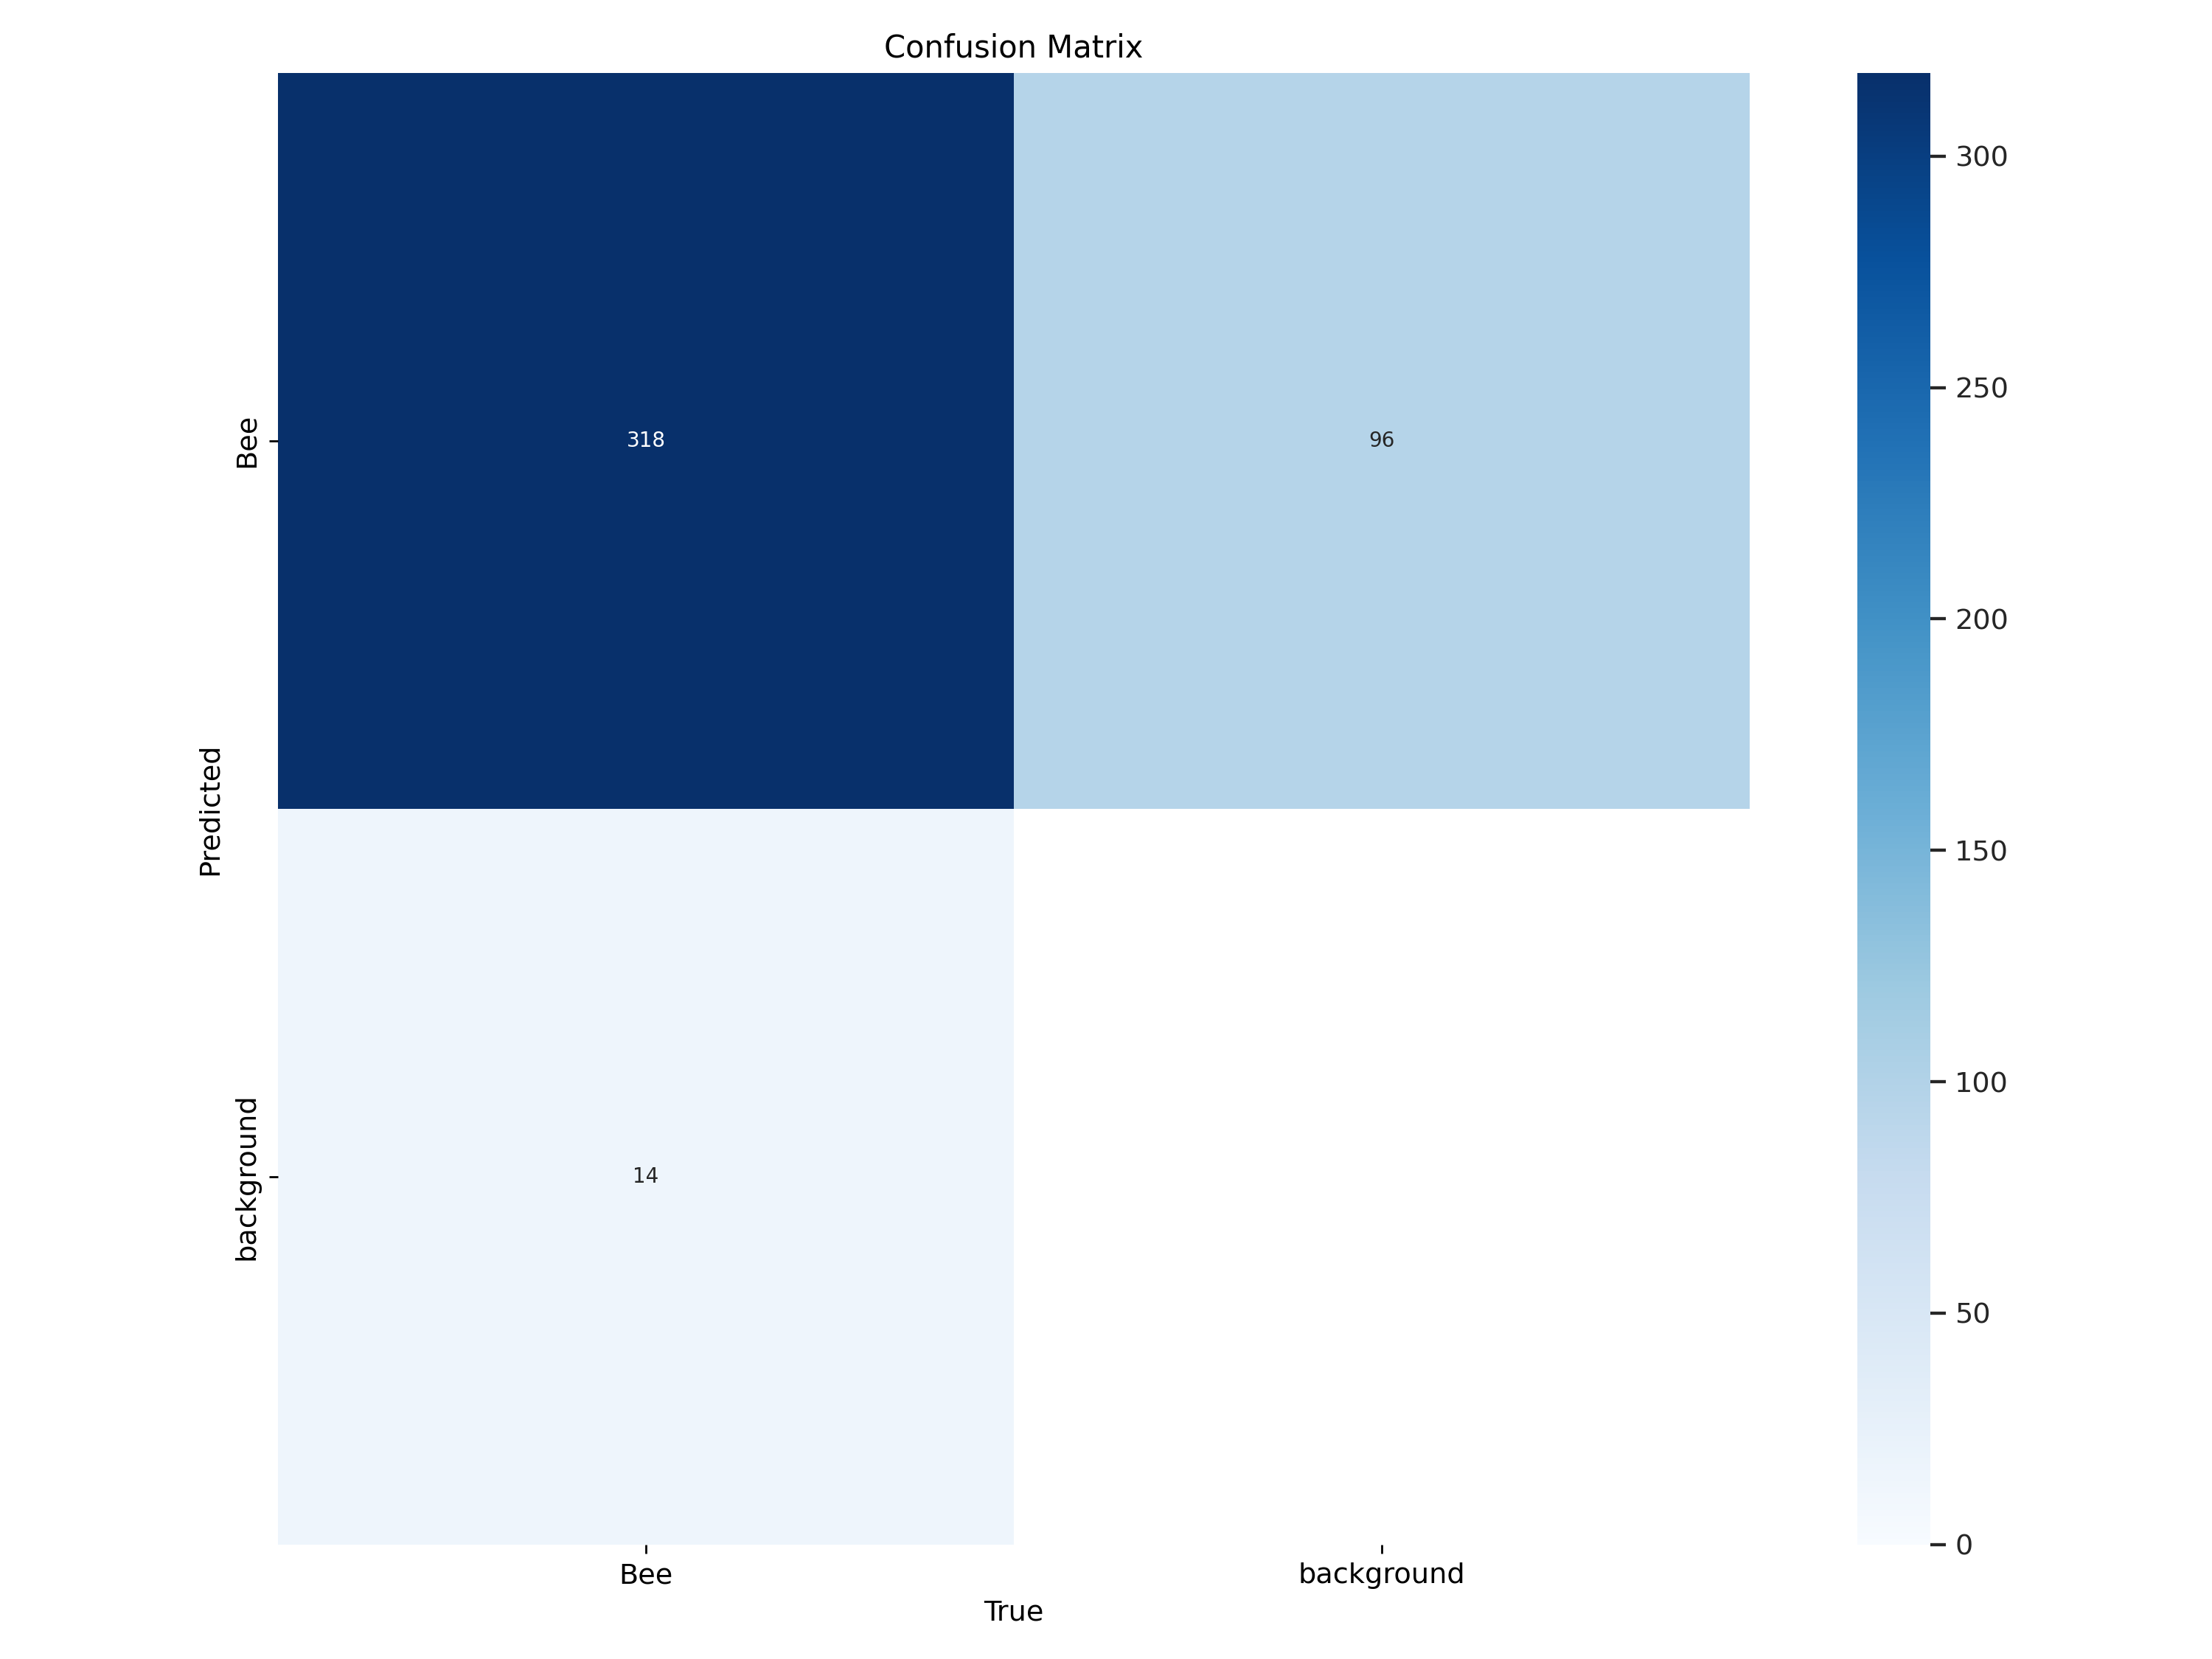

In [9]:
Image(filename=f'/content/bee-training/exp_v12/confusion_matrix.png', width=600)

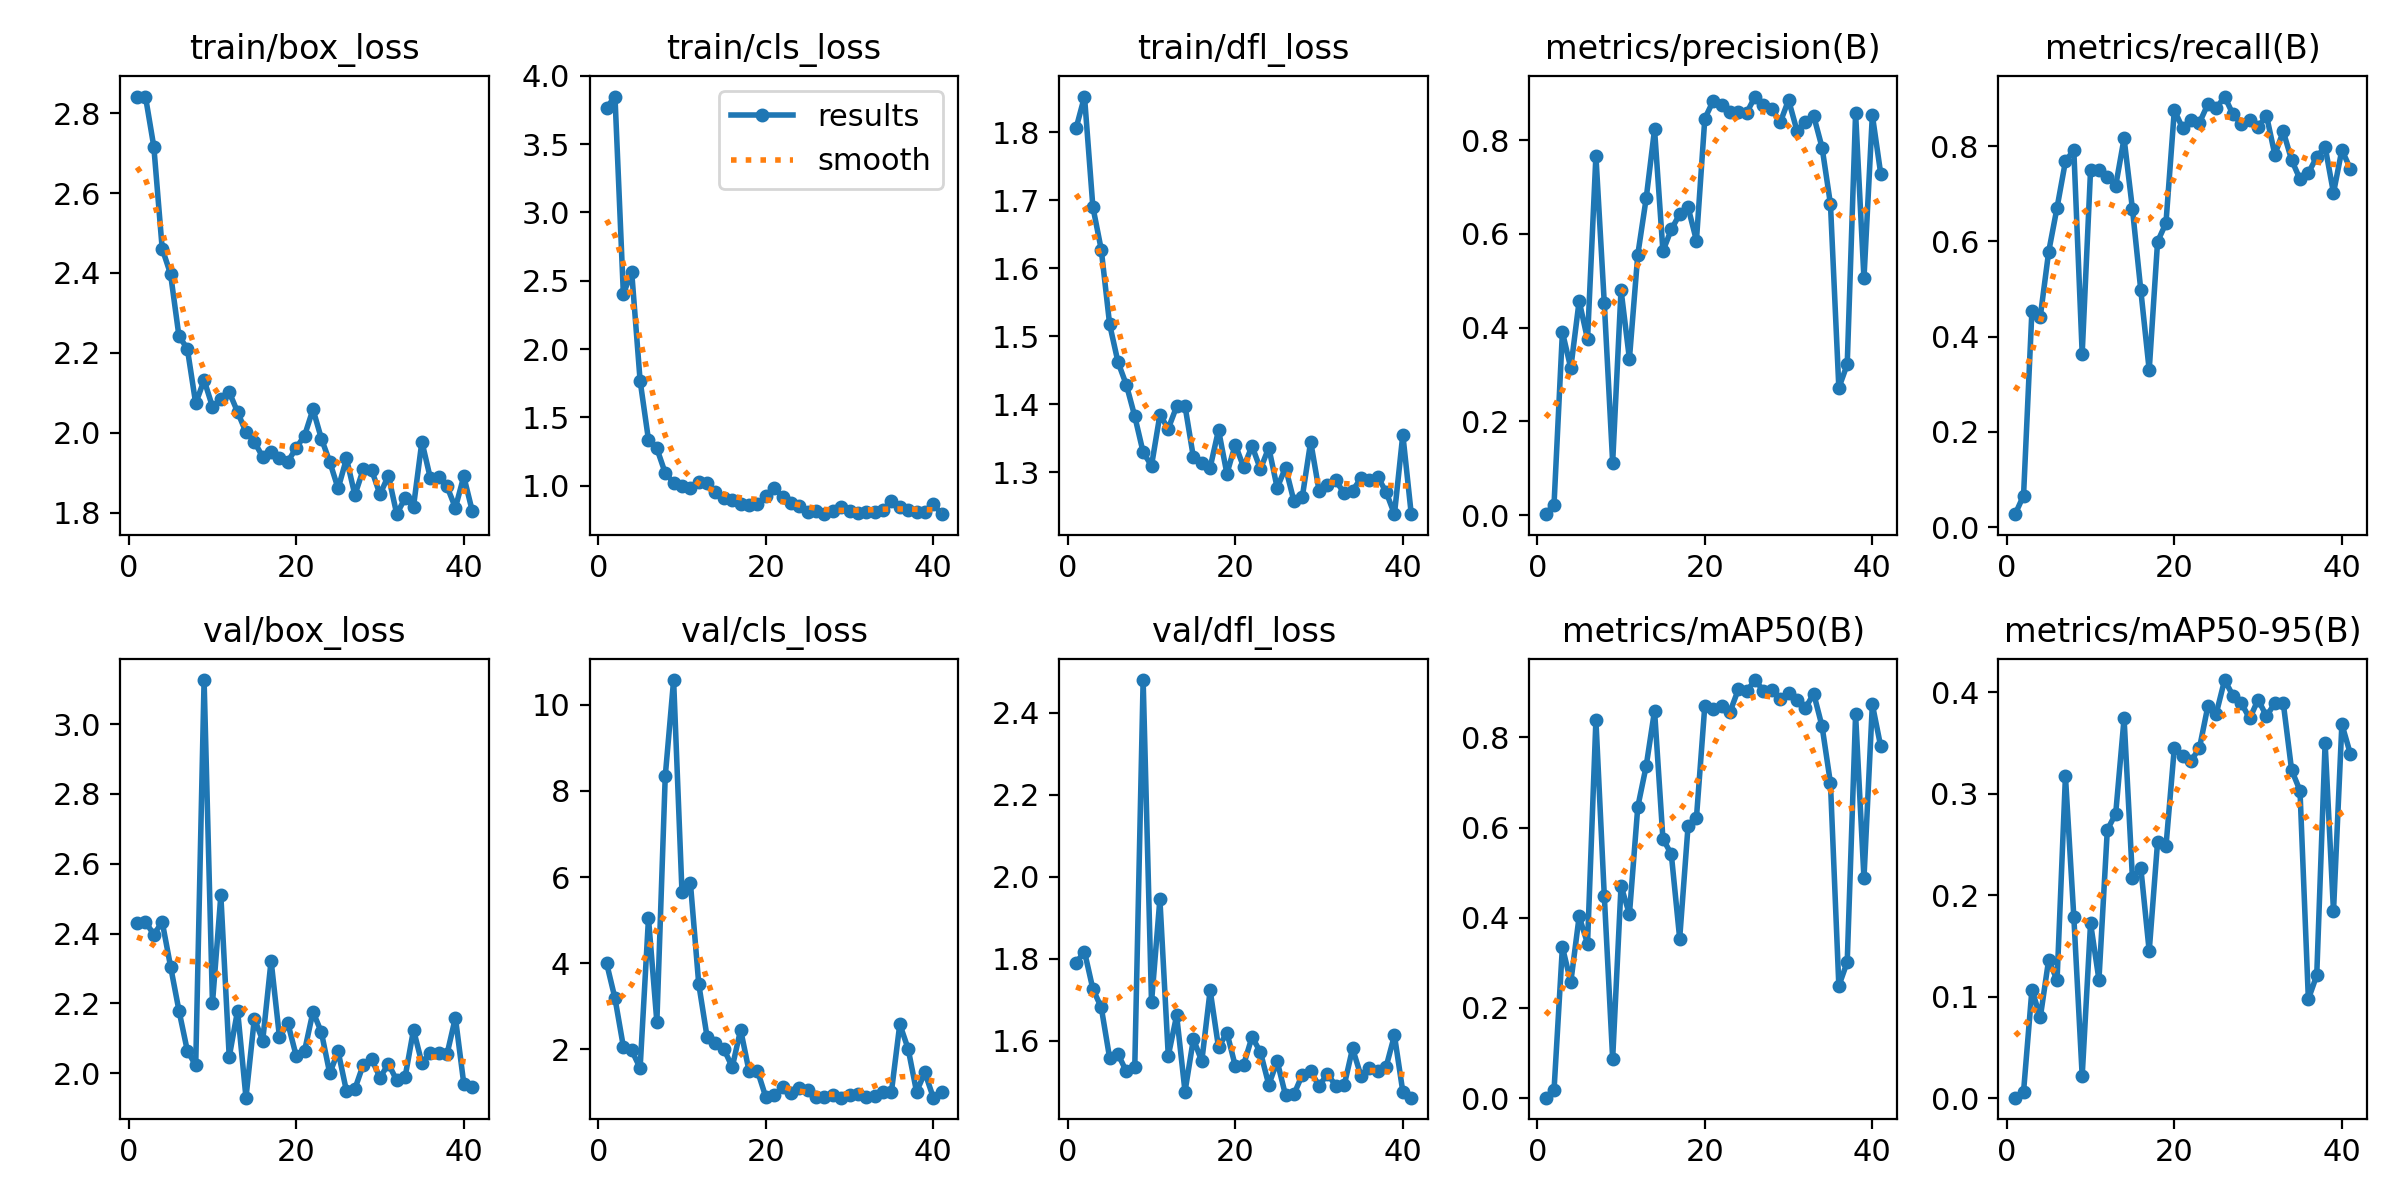

In [10]:
Image(filename=f'/content/bee-training/exp_v12/results.png', width=600)

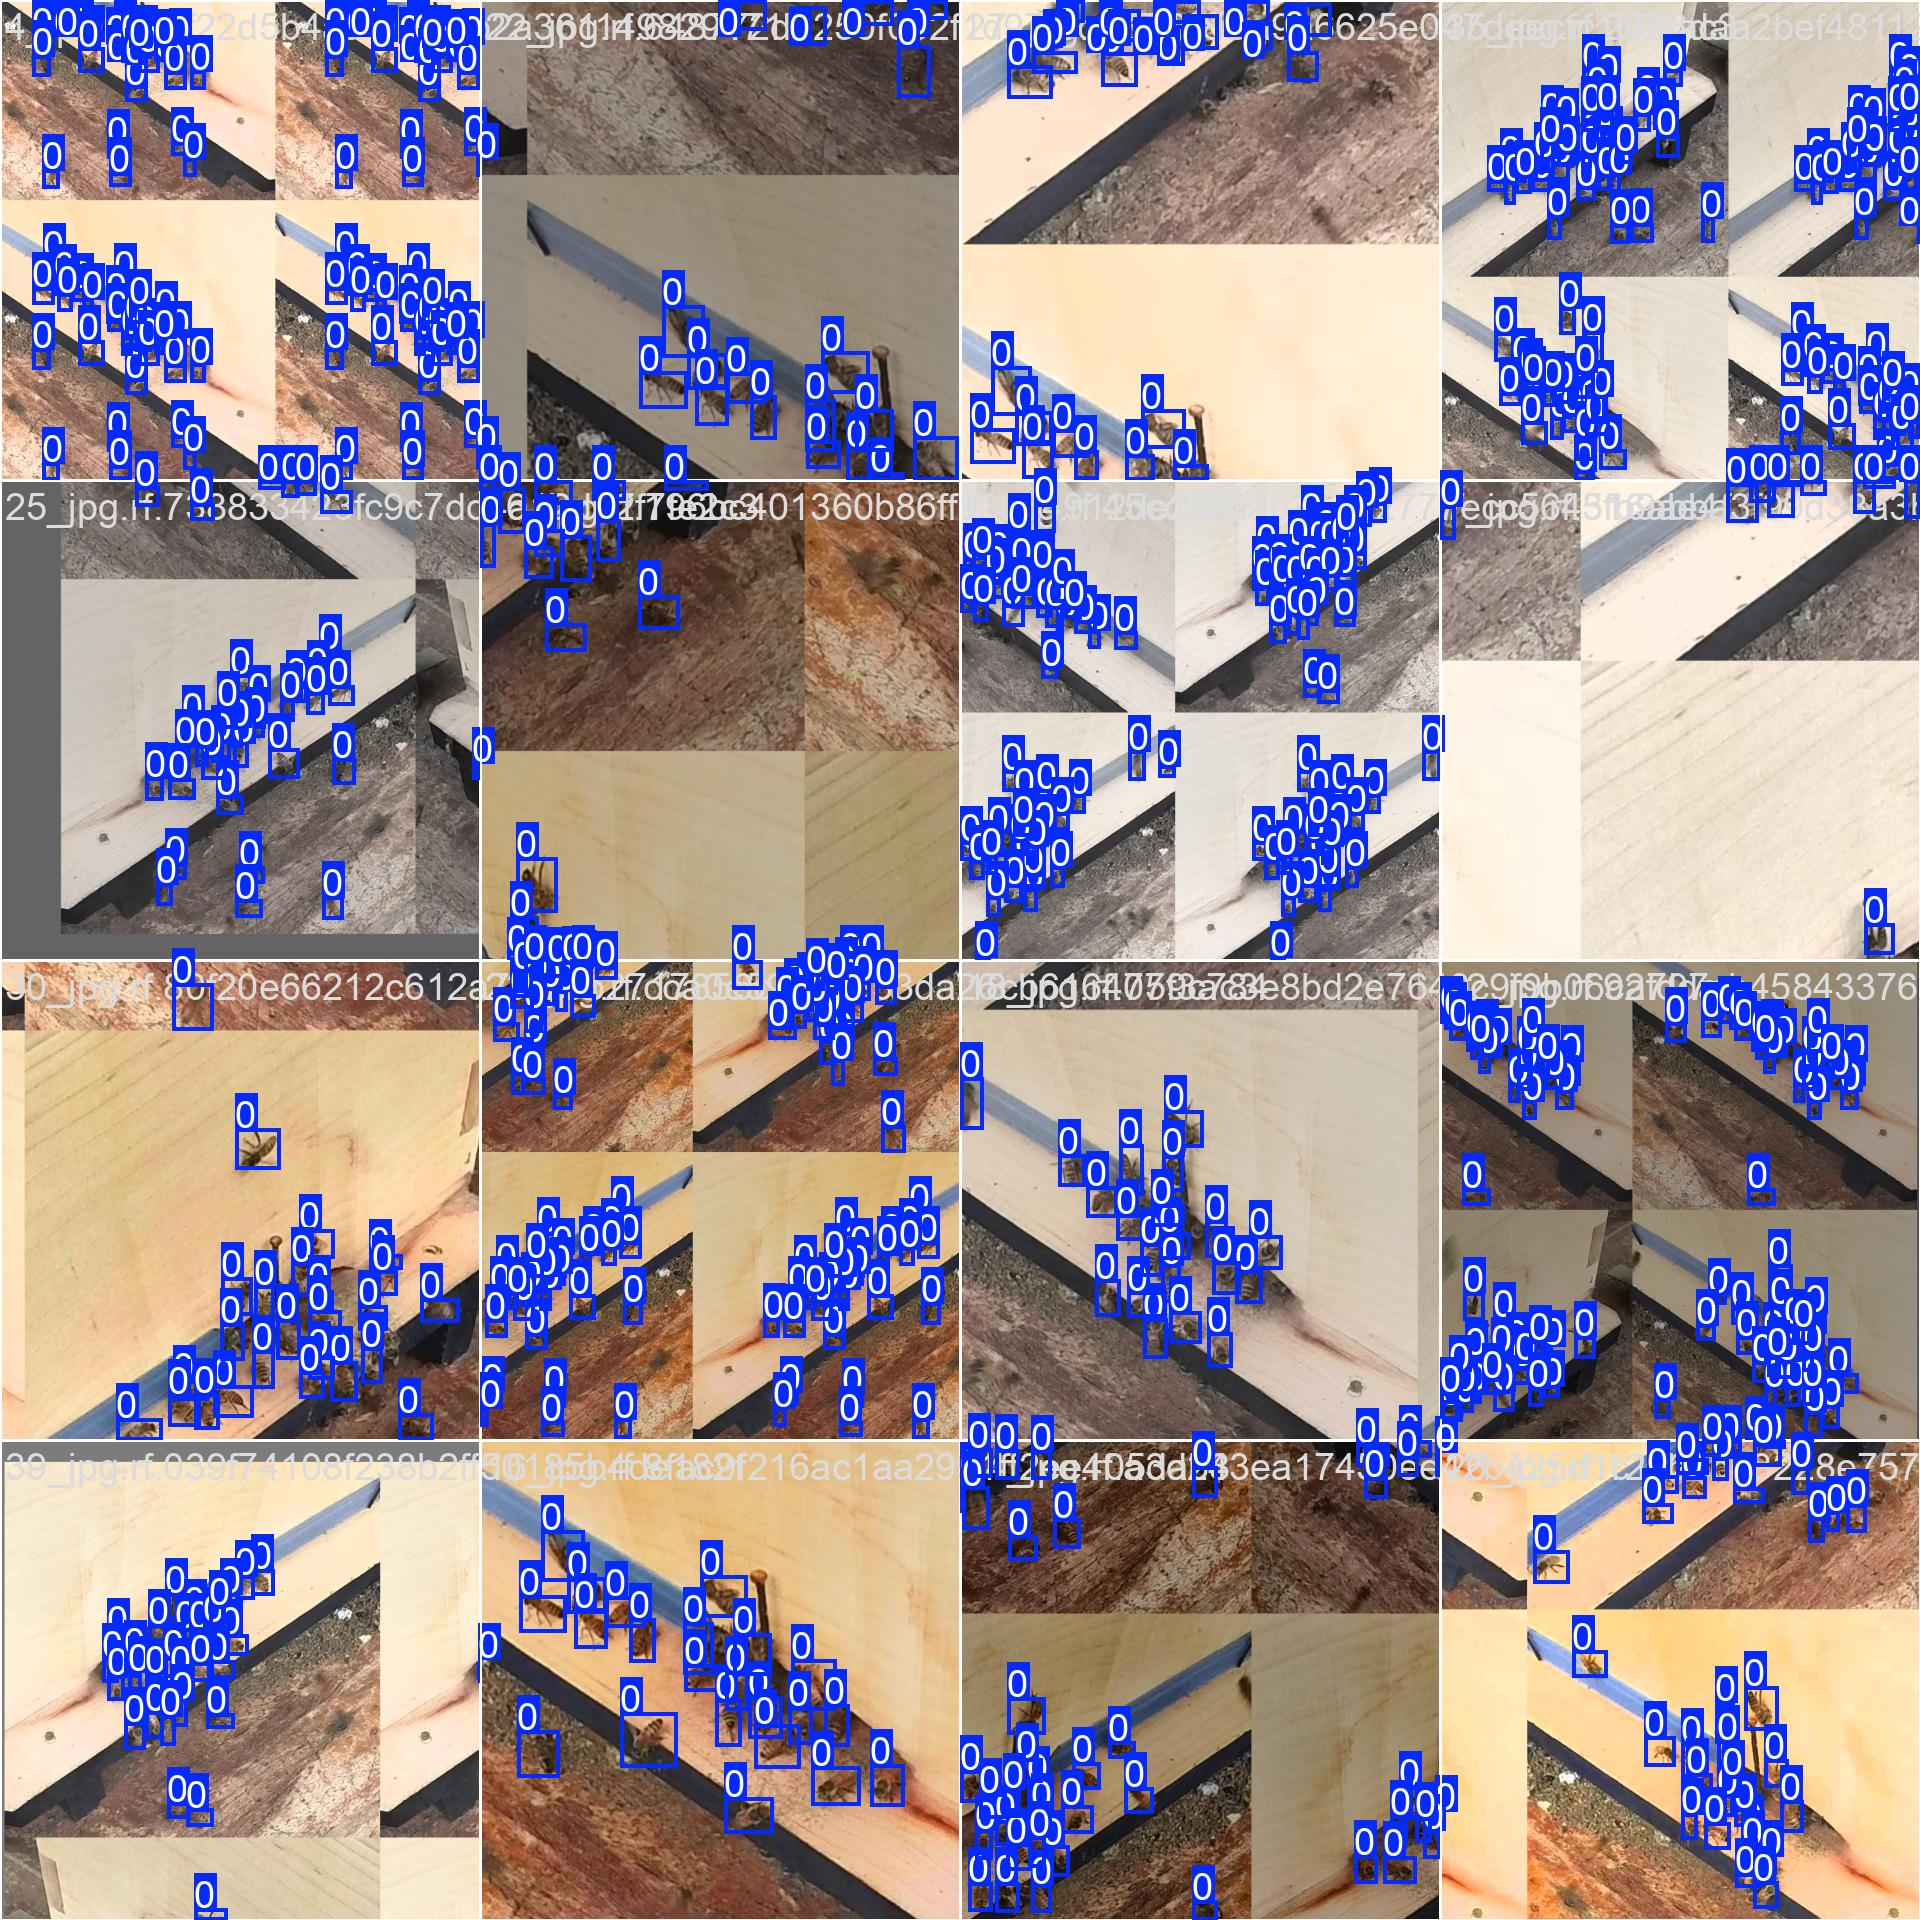

In [11]:
Image(filename=f'/content/bee-training/exp_v12/train_batch0.jpg', width=600)

## Inference

In [12]:
test_data = glob.glob('/content/datasets/ISW_LIGHT_BEE-1/test/images/*.jpg')
results = model.predict(test_data, save=True, show_labels=False, show_conf=False, conf=0.1)
results


0: 640x640 47 Bees, 78.1ms
1: 640x640 40 Bees, 78.1ms
Speed: 1.7ms preprocess, 78.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to bee-training/exp_v122


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Bee'}
 obb: None
 orig_img: array([[[191, 217, 231],
         [191, 217, 231],
         [191, 217, 231],
         ...,
         [178, 215, 237],
         [177, 214, 236],
         [177, 214, 236]],
 
        [[192, 218, 232],
         [192, 218, 232],
         [192, 218, 232],
         ...,
         [178, 215, 237],
         [177, 214, 236],
         [177, 214, 236]],
 
        [[192, 218, 232],
         [192, 218, 232],
         [192, 218, 232],
         ...,
         [178, 215, 237],
         [177, 214, 236],
         [177, 214, 236]],
 
        ...,
 
        [[ 59,  61,  71],
         [ 58,  60,  70],
         [ 59,  61,  71],
         ...,
         [163, 191, 221],
         [146, 176, 205],
         [118, 148, 177]],
 
        [[ 59,  61,  71],
         [ 58,  60,  70],
         [ 60,  62,  72],
         ...,
         [141, 169, 1

In [13]:
image = cv2.imread('datasets/ISW_LIGHT_BEE-1/test/images/43_jpg.rf.abb572684b9594c10d7487834b812459.jpg')
result = model(image)[0]
result = model.track(image)[0]
detections = sv.Detections.from_ultralytics(result)


0: 640x640 32 Bees, 32.1ms
Speed: 2.2ms preprocess, 32.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.9s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


0: 640x640 28 Bees, 20.4ms
Speed: 1.9ms preprocess, 20.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


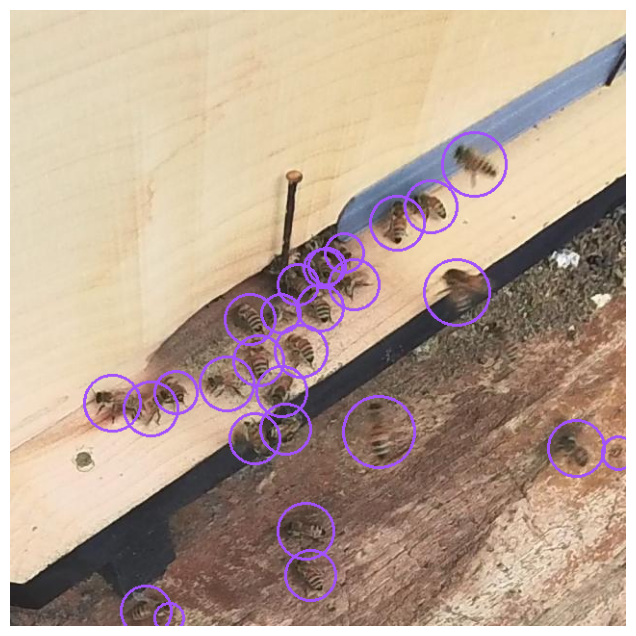

In [14]:
circle_annotator = sv.CircleAnnotator()
annotated_frame = circle_annotator.annotate(
     scene=image.copy(),
     detections=detections
 )
%matplotlib inline
sv.plot_image(image=annotated_frame, size=(8, 8))